In [5]:
# Must be included at the beginning of each notebook. Remember to change the app name. 
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('data_understanding').getOrCreate()

In [6]:
# Use Spark to read in the Maternal Health csv file; you can infer csv schemas.
data = spark.read.csv("Maternal Health Risk Data Set.csv", inferSchema=True, header=True)
data.show()

+---+----------+-----------+----------+--------+---------+---------+----------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+---+----------+-----------+----------+--------+---------+---------+----------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|no comment|
| 35|       140|         90|      13.0|    98.0|       70|high risk|no comment|
| 29|        90|         70|       8.0|   100.0|       80|high risk|no comment|
| 30|       140|         85|       7.0|    98.0|       70|high risk|no comment|
| 35|       120|         60|       6.1|    98.0|       76| low risk|no comment|
| 23|       140|         80|      7.01|    98.0|       70|high risk|no comment|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|no comment|
| 35|        85|         60|      11.0|   102.0|       86|high risk|no comment|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|no comment|
| 42|       130|         80|      18.0| 

In [7]:
# number of rows
data.count()

1018

In [8]:
# number of columns
len(data.columns)

8

In [9]:
data.describe(["comment"]).show() 

+-------+----------+
|summary|   comment|
+-------+----------+
|  count|      1018|
|   mean|      null|
| stddev|      null|
|    min|no comment|
|    max|no comment|
+-------+----------+



In [10]:
# unique data in 'comment' attribute
data.select(["comment"]).distinct().show()

+----------+
|   comment|
+----------+
|no comment|
+----------+



In [11]:
# select 'Age' <= 0 or 'Age' > 100
data.filter((data['Age']<=0) | (data['Age']>100)).show()

+--------+----------+-----------+----------+--------+---------+---------+----------+
|     Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+
|-9999999|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|      -1|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|     -23|       130|         70|       6.9|    98.0|       70| mid risk|no comment|
|    1000|       110|         65|       7.1|    96.0|       70| low risk|no comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+



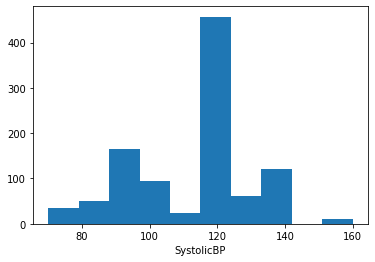

In [12]:
# visualise bar plot of 'SystolicBP'
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert 'SystolicBP' to an array using Numpy and plot it using pyplot. 
sysArr = np.array(data.select('SystolicBP').collect())
plt.hist(sysArr)
plt.xlabel('SystolicBP')
plt.show()

In [13]:
# rows with 'SystolicBP'== 160
data.filter(data['SystolicBP']==160).show()

+---+----------+-----------+----------+--------+---------+---------+----------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+---+----------+-----------+----------+--------+---------+---------+----------+
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0|    98.0|       77|high risk|no comment|
| 40|       160|        100|      19.0| 

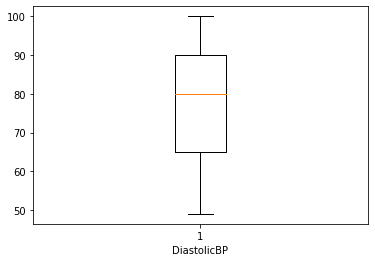

In [14]:
# Convert 'DiastolicBP' to an array using Numpy and plot it using pyplot. 
dysArr = np.array(data.select('DiastolicBP').collect())
plt.boxplot(dysArr)
plt.xlabel('DiastolicBP')
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bloodsugar', ylabel='Density'>

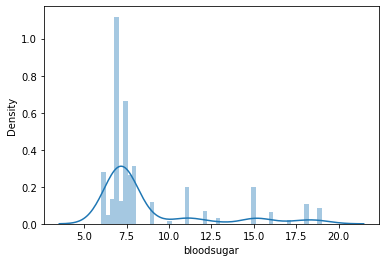

In [15]:
import seaborn as sns
# Convert 'DiastolicBP' to an array using Numpy and plot it using pyplot. 
bs = np.array(data.select('bloodsugar').collect())
sns.distplot(bs, axlabel='bloodsugar')

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

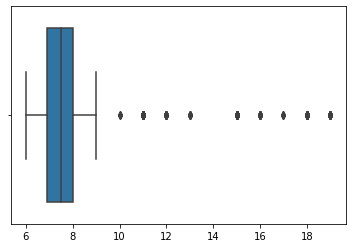

In [16]:
sns.boxplot(bs)

In [17]:
# count for the 'bloodsugar'>8
bs_data=data.filter(data['bloodsugar']>8).groupby(['bloodsugar']).count()
bs_data.orderBy(['bloodsugar']).show()

+----------+-----+
|bloodsugar|count|
+----------+-----+
|       9.0|   31|
|      10.0|    4|
|      11.0|   52|
|      12.0|   18|
|      13.0|    9|
|      15.0|   53|
|      16.0|   17|
|      17.0|    5|
|      18.0|   29|
|      19.0|   22|
+----------+-----+



In [18]:
# count 'bodyTemp'
bt_data = data.groupby(['bodyTemp']).count()
bt_data.orderBy(['bodyTemp']).show()

+--------+-----+
|bodyTemp|count|
+--------+-----+
|    96.0|    4|
|    98.0|  804|
|    98.4|    2|
|    98.6|    1|
|    99.0|   10|
|   100.0|   20|
|   101.0|   98|
|   102.0|   66|
|   103.0|   13|
+--------+-----+



Text(0.5, 0, 'bodyTemp')

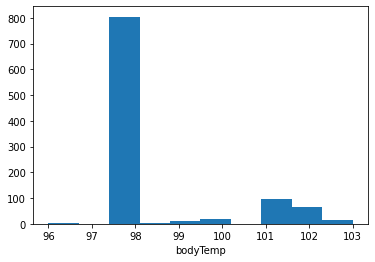

In [19]:
#import seaborn as sns
# Convert 'bodyTemp' to an array using Numpy and plot it using pyplot. 
bt = np.array(data.select('bodyTemp').collect())
plt.hist(bt); plt.xlabel('bodyTemp')

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartRate', ylabel='Density'>

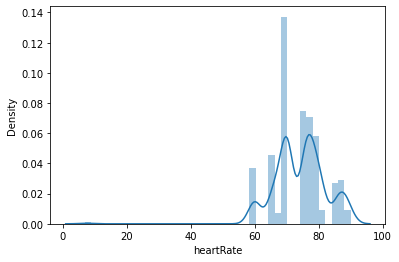

In [20]:
# Convert 'heartRate' to an array using Numpy and plot it using pyplot. 
hr = np.array(data.select('heartRate').collect())
sns.distplot(hr, axlabel='heartRate')

Text(0.5, 0, 'heartRate')

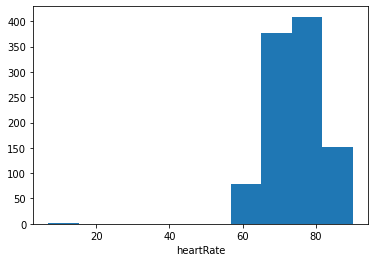

In [21]:
plt.hist(hr); plt.xlabel('heartRate')

In [22]:
data.filter(data['heartRate']<20).show()

+---+----------+-----------+----------+--------+---------+---------+----------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+---+----------+-----------+----------+--------+---------+---------+----------+
| 16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
| 16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
+---+----------+-----------+----------+--------+---------+---------+----------+



In [23]:
rl = data.groupby(['riskLevel']).count()
rl.show()

+---------+-----+
|riskLevel|count|
+---------+-----+
|     High|    1|
|      Low|    1|
| low risk|  408|
|low risk |    1|
| MID RISK|    1|
|HIGH RISK|    1|
| mid risk|  333|
|      Mid|    1|
|mid risk |    1|
|high risk|  269|
|         |    1|
+---------+-----+



In [24]:
# count of distinct 'riskLevel'
rl.count()

11

In [25]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler

In [26]:
x=data.columns[0:6]

In [27]:
import pandas as pd
data.columns[0:7]

['Age',
 'SystolicBP',
 'DiastolicBP',
 'bloodsugar',
 'bodyTemp',
 'heartRate',
 'riskLevel']

In [28]:
df_data=data.select(data.columns[0:7])
df_data.show()

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|
| 35|       140|         90|      13.0|    98.0|       70|high risk|
| 29|        90|         70|       8.0|   100.0|       80|high risk|
| 30|       140|         85|       7.0|    98.0|       70|high risk|
| 35|       120|         60|       6.1|    98.0|       76| low risk|
| 23|       140|         80|      7.01|    98.0|       70|high risk|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|
| 35|        85|         60|      11.0|   102.0|       86|high risk|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|
| 42|       130|         80|      18.0|    98.0|       70|high risk|
| 23|        90|         60|      7.01|    98.0|       76| low risk|
| 19|       120|         80|      

In [29]:
df_data=data.select(data.columns[0:7])
df_data.show(3)

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|
| 35|       140|         90|      13.0|    98.0|       70|high risk|
| 29|        90|         70|       8.0|   100.0|       80|high risk|
+---+----------+-----------+----------+--------+---------+---------+
only showing top 3 rows



In [30]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="riskLevel", outputCol="riskLevelIndex")
indexed = indexer.fit(df_data).transform(df_data)
indexed.show()

+---+----------+-----------+----------+--------+---------+---------+--------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|riskLevelIndex|
+---+----------+-----------+----------+--------+---------+---------+--------------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|           2.0|
| 35|       140|         90|      13.0|    98.0|       70|high risk|           2.0|
| 29|        90|         70|       8.0|   100.0|       80|high risk|           2.0|
| 30|       140|         85|       7.0|    98.0|       70|high risk|           2.0|
| 35|       120|         60|       6.1|    98.0|       76| low risk|           0.0|
| 23|       140|         80|      7.01|    98.0|       70|high risk|           2.0|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|           1.0|
| 35|        85|         60|      11.0|   102.0|       86|high risk|           2.0|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|        

In [31]:
indexed=indexed.select(['Age', 'SystolicBP', 'DiastolicBP', 'bloodsugar', 'bodyTemp', 'heartRate', 'riskLevelIndex'])
indexed.show(3)

+---+----------+-----------+----------+--------+---------+--------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevelIndex|
+---+----------+-----------+----------+--------+---------+--------------+
| 25|       130|         80|      15.0|    98.0|       86|           2.0|
| 35|       140|         90|      13.0|    98.0|       70|           2.0|
| 29|        90|         70|       8.0|   100.0|       80|           2.0|
+---+----------+-----------+----------+--------+---------+--------------+
only showing top 3 rows



In [32]:
df_data=indexed
print(df_data.printSchema()) 

root
 |-- Age: integer (nullable = true)
 |-- SystolicBP: integer (nullable = true)
 |-- DiastolicBP: integer (nullable = true)
 |-- bloodsugar: double (nullable = true)
 |-- bodyTemp: double (nullable = true)
 |-- heartRate: integer (nullable = true)
 |-- riskLevelIndex: double (nullable = false)

None


In [33]:
va = VectorAssembler(inputCols = x, outputCol='features')

va_df = va.transform(indexed)
va_df.show(3)

+---+----------+-----------+----------+--------+---------+--------------+--------------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevelIndex|            features|
+---+----------+-----------+----------+--------+---------+--------------+--------------------+
| 25|       130|         80|      15.0|    98.0|       86|           2.0|[25.0,130.0,80.0,...|
| 35|       140|         90|      13.0|    98.0|       70|           2.0|[35.0,140.0,90.0,...|
| 29|        90|         70|       8.0|   100.0|       80|           2.0|[29.0,90.0,70.0,8...|
+---+----------+-----------+----------+--------+---------+--------------+--------------------+
only showing top 3 rows



In [34]:
va_df = va_df.select(['features', 'riskLevelIndex'])
va_df.show(3)

+--------------------+--------------+
|            features|riskLevelIndex|
+--------------------+--------------+
|[25.0,130.0,80.0,...|           2.0|
|[35.0,140.0,90.0,...|           2.0|
|[29.0,90.0,70.0,8...|           2.0|
+--------------------+--------------+
only showing top 3 rows



In [43]:
DT = DecisionTreeClassifier(featuresCol="features", labelCol='riskLevelIndex', seed=4)
DT=DT.fit(va_df)
DT

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b51b22344020, depth=5, numNodes=25, numClasses=11, numFeatures=6

In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [45]:
DT.featureImportances

SparseVector(6, {0: 0.0434, 1: 0.2996, 3: 0.6118, 4: 0.039, 5: 0.0062})

In [46]:
indexed.show()

+---+----------+-----------+----------+--------+---------+--------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevelIndex|
+---+----------+-----------+----------+--------+---------+--------------+
| 25|       130|         80|      15.0|    98.0|       86|           2.0|
| 35|       140|         90|      13.0|    98.0|       70|           2.0|
| 29|        90|         70|       8.0|   100.0|       80|           2.0|
| 30|       140|         85|       7.0|    98.0|       70|           2.0|
| 35|       120|         60|       6.1|    98.0|       76|           0.0|
| 23|       140|         80|      7.01|    98.0|       70|           2.0|
| 23|       130|         70|      7.01|    98.0|       78|           1.0|
| 35|        85|         60|      11.0|   102.0|       86|           2.0|
| 32|       120|         90|       6.9|    98.0|       70|           1.0|
| 42|       130|         80|      18.0|    98.0|       70|           2.0|
| 23|        90|         60|      7.01

In [47]:
features_imp_pd = (
     pd.DataFrame(
       DT.featureImportances.toArray(), 
       index=indexed.columns[0:6], 
       columns=['importance'])
)

In [48]:
features_imp_pd

,importance
Age,0.043358
SystolicBP,0.299582
DiastolicBP,0.000000
bloodsugar,0.611776
bodyTemp,0.039046
heartRate,0.006239


<BarContainer object of 6 artists>

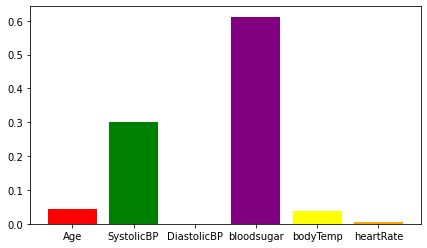

In [49]:
# plot feature importance
new_color = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
plt.rcParams["figure.figsize"]=(7,4)
plt.bar(indexed.columns[0:6], DT.featureImportances.toArray(), color=new_color)

In [50]:
cor=[]; col=[]
for i in range(0,6):
    cor.append(df_data.stat.corr(df_data.columns[i], 'riskLevelIndex'))
    col.append(df_data.columns[i])
pd.DataFrame(cor,col, columns=['correlation coefficient with riskLevel'])

,correlation coefficient with riskLevel
Age,0.029405
SystolicBP,0.336651
DiastolicBP,0.300648
bloodsugar,0.481743
bodyTemp,0.114231
heartRate,0.174703


In [51]:
# select 'Age' <= 0 or 'Age' > 100
data.filter((data['Age']<=0) | (data['Age']>100) | (data['riskLevel'] == " ") | (data['heartRate']==7)).show()

+--------+----------+-----------+----------+--------+---------+---------+----------+
|     Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+
|      15|       110|         90|      7.02|    98.0|       70|         |no comment|
|-9999999|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|      -1|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|     -23|       130|         70|       6.9|    98.0|       70| mid risk|no comment|
|    1000|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|      16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
|      16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+



In [56]:
# extreme values of the column in pyspark
data.agg({'Age': 'min'}).show()

+--------+
|min(Age)|
+--------+
|-9999999|
+--------+



In [57]:
# extreme value
data.agg({'Age': 'max'}).show()

+--------+
|max(Age)|
+--------+
|    1000|
+--------+



In [263]:
# extreme value and count
data.agg({'heartRate': 'min'}).show()

+--------------+
|min(heartRate)|
+--------------+
|             7|
+--------------+



In [276]:
data.filter(data['heartRate']==7).count()

2

Text(0.5, 0, 'heartRate')

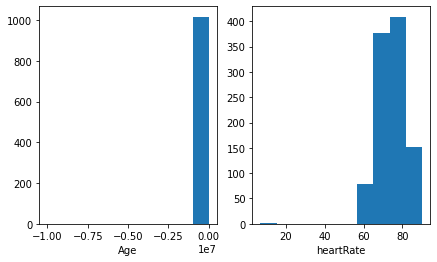

In [282]:
# Convert 'Age' to an array using Numpy and plot it using pyplot. 
ag = np.array(data.select('Age').collect()); 
plt.subplot(1,2,1); plt.hist(ag); plt.xlabel('Age')

hr = np.array(data.select('heartRate').collect());
plt.subplot(1,2,2); plt.hist(hr); plt.xlabel('heartRate')

In [285]:
# unique classes and counts of 'riskLevel'
rl = data.groupby(['riskLevel']).count()
rl.show()

+---------+-----+
|riskLevel|count|
+---------+-----+
|     High|    1|
|      Low|    1|
| low risk|  408|
|low risk |    1|
| MID RISK|    1|
|HIGH RISK|    1|
| mid risk|  333|
|      Mid|    1|
|mid risk |    1|
|high risk|  269|
|         |    1|
+---------+-----+

